# Load dataset 

In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,NaN,NaN,NaN
2642,ham,"They can try! They can get lost, in fact. Tee hee",NaN,NaN,NaN
5452,ham,What???? Hello wats talks email address?,NaN,NaN,NaN
3846,spam,Fantasy Football is back on your TV. Go to Sky...,NaN,NaN,NaN
3886,ham,Cab is available.they pick up and drop at door...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

 1. DataCleaning [to remove NaN values ]
 2. EDA 
 3. Text preprocessing
 4. Model building
 5. Evaluation 
 6. Improvement
 7. Website 
 8. Deployment 

# 1. DATA CLEANING 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop last 3 columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
348,spam,Fancy a shag? I do.Interested? sextextuk.com t...
668,ham,Have a good evening! Ttyl
2808,ham,Oh yeah I forgot. U can only take 2 out shoppi...
1039,ham,They just talking thats it de. They wont any o...
738,ham,Wish i were with you now!


In [9]:
# Renaming the columns to descriptive one [ here we will use dictionary]
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
4831,ham,Rats. Hey did u ever vote for the next themes?
3752,ham,Ya that one is slow as poo
2888,ham,My battery is low babe
3181,ham,"My Parents, My Kidz, My Friends n My Colleague..."
5457,ham,Arun can u transfr me d amt


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Target']=encoder.fit_transform(df['Target'])  
# it will assign 0 & 1 to ham and spam respectively 

In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# always check missing values first in data 
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
# check for duplicate values 
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. EDA

In [18]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

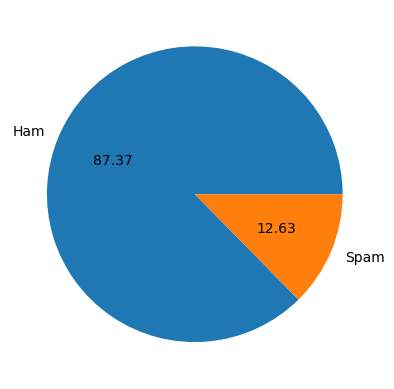

In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

 From above we understand data is imbalanced

In [21]:
# to check how many sentences , words , characters are used for this
# we need a library of NLT[natural language tool] called "nltk"(natural lang.. tool kit)
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Abhineet
[nltk_data]     Kaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters']=df['Text'].apply(len) # no. of characters in each sentence

In [24]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
from nltk import word_tokenize
from nltk import sent_tokenize

In [26]:
#num of words 
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# num of sentences 
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# to analyse ham and spam differently for better understanding [ 0=ham;1=spam]
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# for spam msgs 
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
# seeing same thing through histogram

In [34]:
import seaborn as sns
sns.set_style("whitegrid")

In [35]:
# plt.figure(figsize=(12,6)   use this to resize the figure 
df[df['Target']==0]['num_characters']
df[df['Target']==1]['num_characters']

2       155
5       148
8       158
9       154
11      136
       ... 
5537     90
5540    160
5547    160
5566    147
5567    161
Name: num_characters, Length: 653, dtype: int64

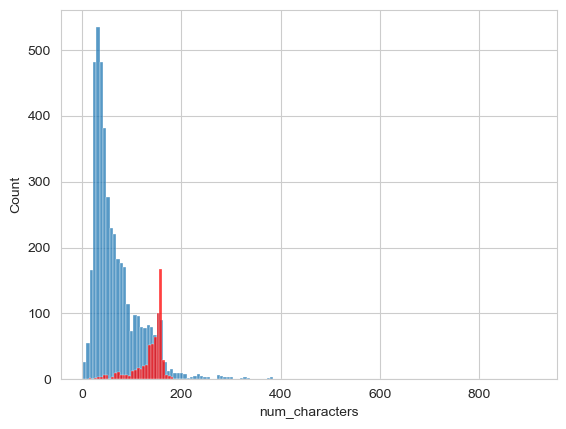

In [109]:
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')
plt.show()

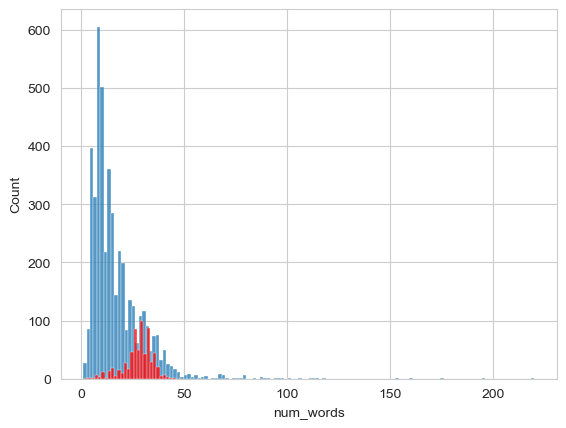

In [110]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')
plt.show()

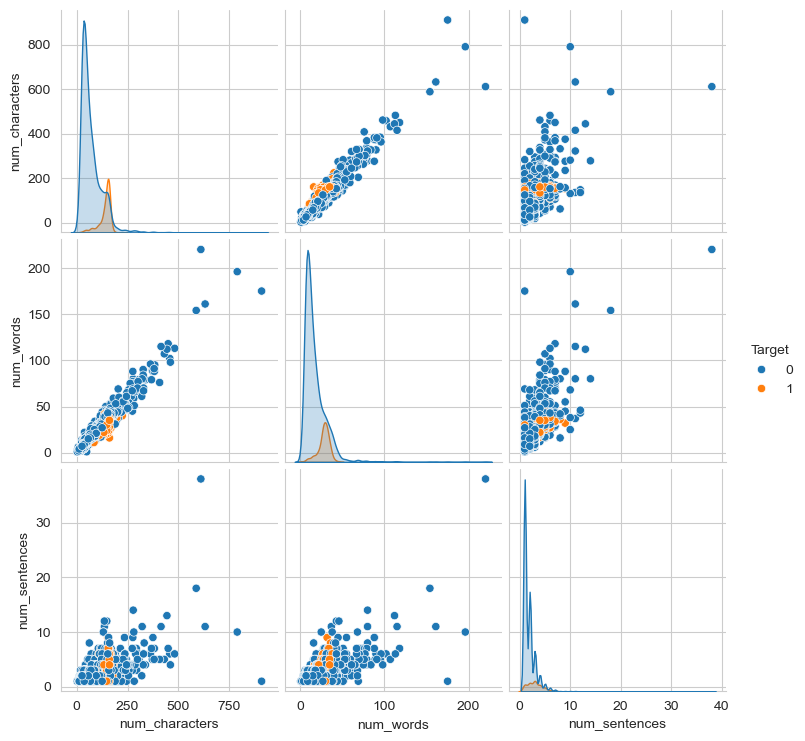

In [111]:
# to see the relation among these columns of characters and words 
sns.pairplot(df,hue='Target')
plt.show()

In [39]:
# to see correlation coffeicent
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['Target','num_characters','num_words','num_sentences']].corr()

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


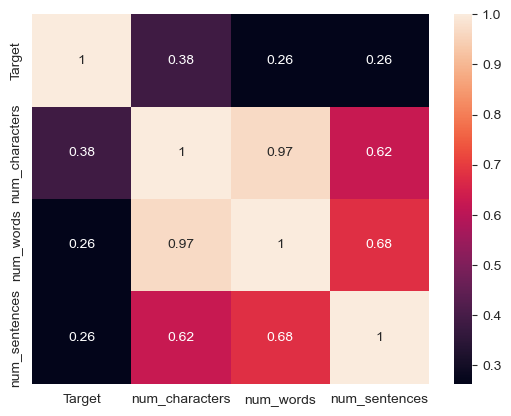

In [112]:
sns.heatmap(df[['Target','num_characters','num_words','num_sentences']].corr(),annot=True)
plt.show()

# 3. Data preprocessing 

 [here generally for text because our data is textual]
 lower case
 
 tokenization  [words me todna hai]
 
 removing speacual charactes 
 
 removing stop words [in,of,the] and puncuation 
 
 stemming [convert 2 or 3 words into 1 word if they are similar meanings,
 [dance,dances,dancing]

In [42]:
df['Text'][200]

'I sent you  &lt;#&gt;  bucks'

In [43]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Abhineet
[nltk_data]     Kaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
from nltk.corpus import stopwords 
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [45]:
# for punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [47]:
# ek fxn bnaenge for lowering,tokenizing, special char,
def transform_text(Text):
    text=Text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum(): #if aplhabetic or numeric value present add it to y not special charactes   
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text =y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [48]:
transform_text('Hi how Are You 20@@ #$%')

'hi 20'

In [49]:
transform_text('Did you like my presentation on ML?#$ ')

'like present ml'

In [50]:
transform_text('I loved the Youtube Lectures on Machine Learning. How about you ?')

'love youtub lectur machin learn'

In [51]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [52]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [53]:
# jo fxn bnaya hai use text pe apply krenge sari preprocessing ke baad result ko alg 
# column me save kr lenge 
df['transformed_text']=df['Text'].apply(transform_text)

In [54]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

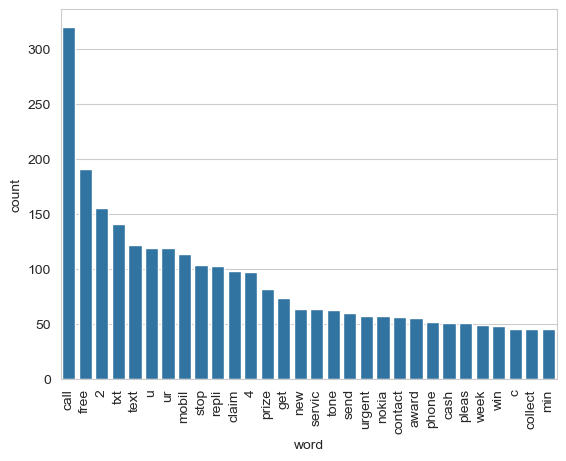

In [60]:
from collections import Counter

# Convert Counter results to a DataFrame for easier plotting
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Create the barplot with named parameters x and y
sns.barplot(x='word', y='count', data=most_common_words)
# Alternative approach if you want to keep your original structure:
# sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
#             y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

In [58]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

35404

In [ ]:
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

We are mainly going to use Naive Bayes approch as it is best algo for textual data
for that it must require a numeric input but in the above data [input=transformed_text,output='target']
so convert input in numerical value or vectors(vectorise) 
there are 3 methods for that 1 is "bag of words" 2nd method is TFIDF 3rd method is word to vec
the method going to use is "bag of words"

In [215]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [216]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [241]:
X.shape

(5169, 3000)

In [ ]:
#not using it becoz it reduce the precision and accuracy of our model 
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [218]:
y = df['Target'].values

In [219]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [222]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [223]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [224]:
gnb.fit(X_train,y_train)
y_pred3 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [225]:
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [226]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [227]:
# tfidf---mnb

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


 checking precision and accuracy for each model one by one

In [229]:
svc = SVC(kernel= 'sigmoid' , gamma=0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression( penalty='l2')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [230]:
clfs ={
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt
}    

In [231]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy, precision

In [235]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [233]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("Model name: ", name)
    print("Accuracy : ", current_accuracy)
    print("precision : ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Model name:  SVC
Accuracy :  0.9294003868471954
precision :  0.9710144927536232
Model name:  KN
Accuracy :  0.9052224371373307
precision :  1.0
Model name:  NB
Accuracy :  0.9709864603481625
precision :  1.0
Model name:  DT
Accuracy :  0.9294003868471954
precision :  0.8282828282828283
Model name:  LR
Accuracy :  0.9564796905222437
precision :  0.979381443298969
Model name:  RF
Accuracy :  0.9758220502901354
precision :  0.9829059829059829


C:\Users\Abhineet Kaur\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model name:  AdaBoost
Accuracy :  0.960348162475822
precision :  0.9292035398230089
Model name:  BgC
Accuracy :  0.9584139264990329
precision :  0.8682170542635659
Model name:  ETC
Accuracy :  0.9748549323017408
precision :  0.9745762711864406
Model name:  GBDT
Accuracy :  0.9468085106382979
precision :  0.9191919191919192


In [236]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision' , ascending=False)

In [237]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
4,LR,0.956480,0.979381
8,ETC,0.974855,0.974576
0,SVC,0.929400,0.971014
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
3,DT,0.929400,0.828283


In [238]:
performance_df1 = pd.melt(performance_df , id_vars = "Algorithm")

In [239]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,LR,Accuracy,0.956480
4,ETC,Accuracy,0.974855
5,SVC,Accuracy,0.929400
6,AdaBoost,Accuracy,0.960348
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.929400


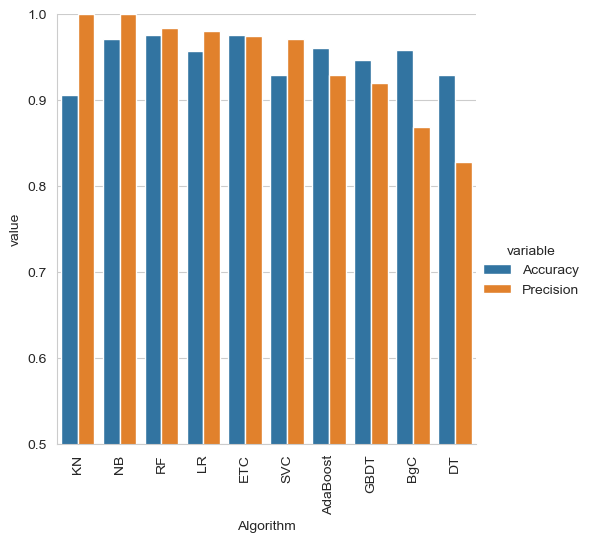

In [240]:
sns.catplot(x = 'Algorithm' , y = 'value' ,
            hue = 'variable' , data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [243]:
import pickle 

In [244]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))